# Applied Statistics Winter 2024 Tasks
Keith McNamara

This notebook comprises of four tasks. These tasks will explore statistics concepts. It will also feature extra work beyond the scope of each task to help formulate a better understanding of the core concepts 

# lady testing tea

Purported to be loosely based on an event in Fisher's life, the experiment is based on a claim by a lady friend of Fisher's that when presented with a cup of tea she could that she could discern whether milk or tea was poured first into her cup. In the experiment the lady is presented with 8 cups of tea, four of which have the milk poured first and four of which have the tea poured first. Fisher's lady friend is then asked to select which cups have the milk poured first. The probability of the lady being able to select the four cups, with milk poured first, correctly is low enough that this outcome would be unlikely. Therefore, if over multiple runs of the experiment if the lady correctly selects the cups with milk poured in first, a statistical unlikelihood, the lady had the ability to discern the order in which tea and milk were poured in the cup.



Problem Statement
Suppose the Lady Tasting Tea experiment is altered to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims that they have the special power of being able to tell if the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

1. Calculate, using Python, the probability that they select the correct six cups.
Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups.

2. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

3. Would you accept two errors? Explain.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import math 
from itertools import combinations
from collections import Counter
import seaborn as sns

In [2]:
total_no_cups = 12  #total number of cups 
milk_cups = 6 #cups with milk 
tea_cups = 6 #cups with tea first 

In [3]:
# Define the observed successes for both scenarios: milk-first and milk-second
observed_successes_milk_first = [6, 5, 4, 3, 2, 1, 0]
observed_successes_milk_second = [6, 5, 4, 3, 2, 1, 0]


now that we the basic layout for our test I want to create a function to get show the results and store the results in a pandas dataframe 

In [4]:
# Step 3: Define a function to compute results
def compute_results(observed_successes, milk_cups, tea_cups, scenario):
    results = []
    comb_total = math.comb(total_no_cups, milk_cups)  # Total combinations for 6 out of 12 cups

    for success in observed_successes:
        errors_made = milk_cups - success
        
        # Permutations for correct identifications: P(k, k) = k!
        perms_correct = math.factorial(success) if success > 0 else 1
        
        # Probability: calculate 1 / comb_total to find the chance of randomly getting the right cups
        probability = perms_correct / comb_total
        
        # Add results to the list
        results.append({
            'Scenario': scenario,
            'Observed Successes': success,
            'Errors Made': errors_made,
            'Combinations': comb_total,
            'Permutations (Correct)': perms_correct,
            'Probability': probability
        })
    return results


In [5]:
# Step 4: Compute results for both scenarios
results_milk_first = compute_results(observed_successes_milk_first, milk_cups, tea_cups, "Milk First")
results_milk_second = compute_results(observed_successes_milk_second, milk_cups, tea_cups, "Milk Second")

# Combine both scenarios into a single DataFrame
df = pd.DataFrame(results_milk_first + results_milk_second)

# Display the DataFrame
df


,Scenario,Observed Successes,Errors Made,Combinations,Permutations (Correct),Probability
0,Milk First,6,0,924,720,0.779221
1,Milk First,5,1,924,120,0.129870
2,Milk First,4,2,924,24,0.025974
3,Milk First,3,3,924,6,0.006494
4,Milk First,2,4,924,2,0.002165
5,Milk First,1,5,924,1,0.001082
6,Milk First,0,6,924,1,0.001082
7,Milk Second,6,0,924,720,0.779221
8,Milk Second,5,1,924,120,0.129870
9,Milk Second,4,2,924,24,0.025974


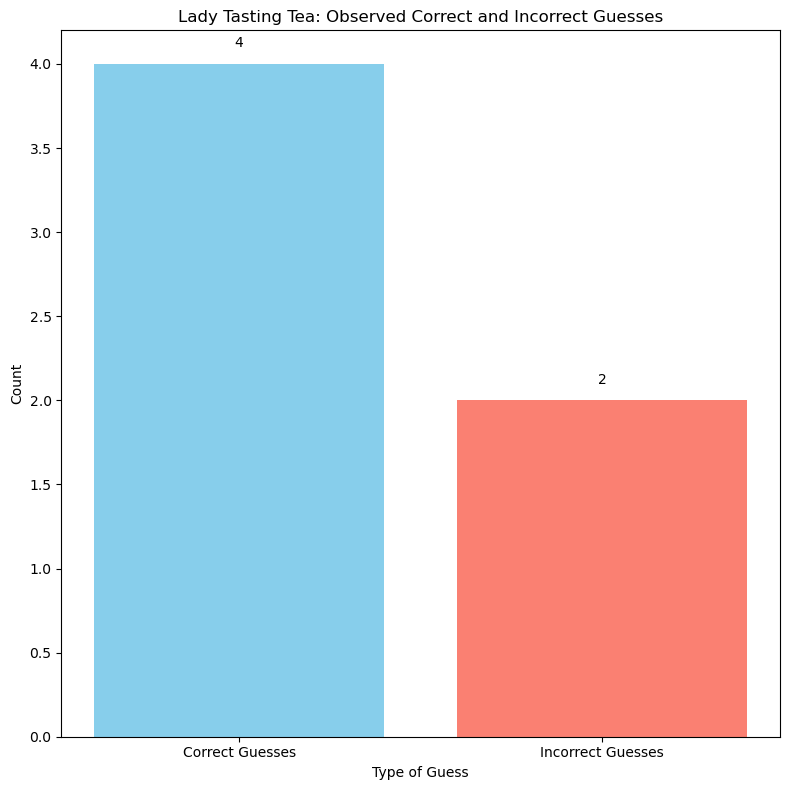

In [6]:
observed_correct_guesses = 4  # correct identification of milk-first
observed_incorrect_guesses = 2  # incorrect identification of tea-first

# Bar labels and values for observed outcome
labels = ["Correct Guesses", "Incorrect Guesses"]
values = [observed_correct_guesses, observed_incorrect_guesses]

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(labels, values, color=['skyblue', 'salmon'])

# Titles and labels
ax.set_title("Lady Tasting Tea: Observed Correct and Incorrect Guesses")
ax.set_ylabel("Count")
ax.set_xlabel("Type of Guess")

# Annotate each bar with the count value
for i, v in enumerate(values):
    ax.text(i, v + 0.1, str(v), ha='center', color='black')

plt.tight_layout()
plt.show()

In [7]:
correct_guess_counts = []
incorrect_guess_counts = []

In [8]:
for guess in combinations(range(total_no_cups), milk_cups):
    correct_guesses = sum(1 for i in guess if i < milk_cups)  # Correctly identified milk-first
    incorrect_guesses = milk_cups - correct_guesses           # Incorrectly identified milk-first
    correct_guess_counts.append(correct_guesses)
    incorrect_guess_counts.append(incorrect_guesses)

In [9]:
# Count occurrences of each possible outcome (number of correct and incorrect guesses)
outcome_counts = Counter(zip(correct_guess_counts, incorrect_guess_counts))



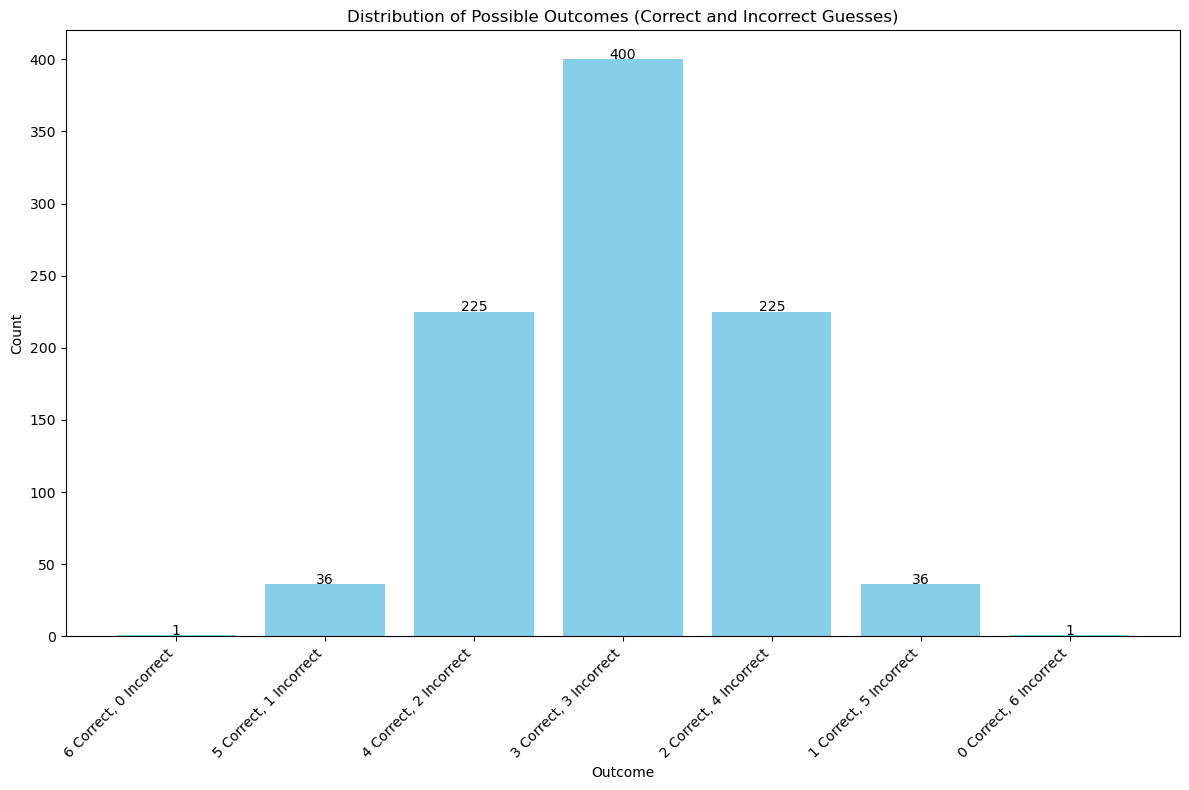

In [10]:
# Separate outcomes for plotting
x_labels = [f"{correct} Correct, {incorrect} Incorrect" for correct, incorrect in outcome_counts.keys()]
y_values = list(outcome_counts.values())

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(x_labels, y_values, color="skyblue")
ax.set_title("Distribution of Possible Outcomes (Correct and Incorrect Guesses)")
ax.set_ylabel("Count")
ax.set_xlabel("Outcome")

# Rotate x labels for readability
plt.xticks(rotation=45, ha="right")

# Annotate each bar with the count value
for i, v in enumerate(y_values):
    ax.text(i, v + 0.2, str(v), ha='center', color='black')

plt.tight_layout()
plt.show()

# Hyptothesis testing 

The process of induction is the process of assuming the simplest law that can be made to harmonize with our experience. This process, however, has no logical foundation but only a psychological one. It is clear that there are no grounds for believing that the simplest course of events will really happen. It is an hypothesis that the sun will rise tomorrow: and this means that we do not know whether it will rise.

– Ludwig Wittgenstein 

when looking at null hypothesis we again need to revisit Fisher, Fisher suggested that a significance level of 0.05 (or 5%) was a reasonable criterion for rejecting the null hypothesis in many cases. His work set the standard for hypothesis testing, and it has been widely adopted ever since so we will use this here. In this task the goal is to assess whether the lady can correctly distinguish the cups. The significance level of 0.05 provides a balance between being too strict (which might overlook her ability) and too lenient (which might falsely suggest she has the ability). If the probability of her success is less than 5%, we conclude that her correct guesses are unlikely to have been due to random chance, and we reject the null hypothesis.

In [11]:
# Null Hypothesis: The lady cannot distinguish between cups with milk first and tea first.
# We reject the null hypothesis if the probability of success is low enough (e.g., below a certain significance level)
significance_level = 0.05 
rejected_null = df[df['Probability']<= significance_level]
if not rejected_null.empty:
    print("Null Hypothesis Rejected: The lady has successfully distinguished between milk-first and tea-first cups.")
else:
    print("Null Hypothesis Not Rejected: The lady has not distinguished between milk-first and tea-first cups.")


Null Hypothesis Rejected: The lady has successfully distinguished between milk-first and tea-first cups.


# other possible ways to create this test?? 

When doing this test and sticking to the proposed question. There are many ways to approach this question so I want to quickly explore these. 



Fishers exact test is a statistical test that determines if two category variables have non-random connections or we can say it’s used to check whether two category variables have a significant relationship. (in this case, the lady's guesses and the actual arrangement of cups). It is typically used in situations where you are working with a 2x2 contingency table and want to test for independence between the variables.

In [12]:
from scipy.stats import fisher_exact

# Create the 2x2 contingency table
# [ [Correct Milk-First Guesses, Incorrect Milk-First Guesses], 
#   [Incorrect Tea-First Guesses, Correct Tea-First Guesses] ]
contingency_table = [[6, 0],  # Milk-first: correct guesses (6), incorrect guesses (0)
                     [4, 2]]  # Tea-first: incorrect guesses (4), correct guesses (2)

# Perform Fisher's Exact Test
odds_ratio, p_value = fisher_exact(contingency_table, alternative='two-sided')

# Output the p-value and odds ratio
print(f"Odds Ratio: {odds_ratio}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant association between the guesses and the actual arrangement.")
else:
    print("Fail to reject the null hypothesis: No significant association between the guesses and the actual arrangement.")


Odds Ratio: inf
P-value: 0.4545454545454546
Fail to reject the null hypothesis: No significant association between the guesses and the actual arrangement.


Another possible way to create this test would be using a binomal test  because it tests whether the proportion of successes (i.e., correct guesses) differs significantly from a hypothesized value. The experiment is fundamentally a binomial process, where each trial (each cup) has one of two possible outcomes: the lady either guesses correctly or incorrectly. Given the binary nature of the outcomes (correct vs. incorrect) and the small sample size, it’s an ideal test to apply in this scenario.

In [13]:
from scipy.stats import binom_test

# Number of correct guesses for milk-first cups
correct_guesses = 6  # Change this to the observed number of correct guesses
total_cups = 6  # Total milk-first cups

# Set the expected probability for the null hypothesis (random guessing)
expected_probability = 0.5  # 50% chance of guessing correctly

# Perform Binomial Test
# We use 'greater' because we are testing if the number of correct guesses is significantly greater than random chance.
p_value = binom_test(correct_guesses, total_cups, expected_probability, alternative='greater')

# Output the p-value
print(f"P-value: {p_value}")

# Interpretation based on p-value
if p_value < 0.05:
    print("We reject the null hypothesis: the result is statistically significant.")
else:
    print("We fail to reject the null hypothesis: the result is not statistically significant.")



P-value: 0.015625
We reject the null hypothesis: the result is statistically significant.


C:\Users\keith\AppData\Local\Temp\ipykernel_3960\1146479267.py:12: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = binom_test(correct_guesses, total_cups, expected_probability, alternative='greater')


In [14]:
from sklearn.metrics import cohen_kappa_score

# Example data (0 = tea-first, 1 = milk-first)
actual = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]  # Actual outcomes
guesses = [1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0]  # Lady's guesses

# Compute Cohen's Kappa
kappa = cohen_kappa_score(actual, guesses)
print(f"Cohen's Kappa: {kappa}")

Cohen's Kappa: 0.6666666666666667


# Balancing Type I and Type II Errors:
1. Type I Error (False Positive): Rejecting the null hypothesis when it is actually true. In this case, concluding that the lady can distinguish between the cups when she really can't. 
2. Type II Error (False Negative): Failing to reject the null hypothesis when it is false. In this case, not recognizing the lady’s ability to distinguish the cups when she can.



# conclusion 
Using this simple experiment, Fisher established most of the fundamental principles for hypothesis testing, which contributed to major advances across biological and physical sciences.  
The result of 4 out of 6 correct guesses is likely to occur by random chance, so it does not provide strong enough evidence to reject the idea that the lady is simply guessing.
If the lady had made fewer errors (such as 1 or 0 errors), it would have been more statistically significant, and we might reject the null hypothesis.

Summary:
1. Two errors (4 correct guesses) would not be enough to reject the null hypothesis.
2. The probability of making two errors by random chance is too high to conclude that the lady can reliably distinguish between milk-first and tea-first.







------------------------------------------------------------------------------------------------------

# task 2 

# What is Normal Distribution
The normal distribution was first described in 1809 by Carl Gauss in the context of measurement errors in astronomy. Since then it has been used and applied extensively in relation to probability, statistics and machine learning. It is the default probability for many real-world scenarios and is widely used because many phenomena found in nature fall into this predictable pattern and can be effectively modeled by relatively simple functions.

Normal distributions share the following characteristics:

1. the mean, median and mode are equal The mean is the numerical average of a data set, the mode is the value that appears most frequently and the median is the middle number. In a normal distribution the top of the curve represents all three of these values and they are equal. The mean is often represented by the greek lower case letter µ (mu). The mean is the central tendency of the normal distribution and it defines the location of the peak for the bell curve around which all other values are clustered.

2. it is symmetrical A normal distribution has a distinctive symmetrical bell shape and is often called a bell curve for this reason. This curve can be divided in the middle to produce two equal and symmetrical halves; the right side of the center is a mirror image of the left side.

3. it is unimodal There is only one mode, or peak, in a normal distribution.

4. it is asymptotic Normal distributions are continuous and have tails that are asymptotic. Continuous variables, as opposed to discrete variables which have finite values, can take on an unlimited number of values between the lowest and highest points of measurement. Asymptotic means that the tails of the distribution never intersect with the X axis.

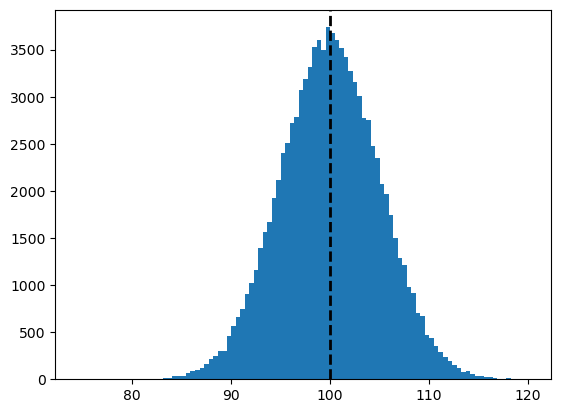

In [15]:
import numpy as np

# taken from https://www.geeksforgeeks.org/python-normal-distribution-in-statistics/
# Mean of the distribution 
Mean = 100

# satndard deviation of the distribution
Standard_deviation  = 5
 
# size
size = 100000
 
# creating a normal distribution data
values = np.random.normal(Mean, Standard_deviation, size)
 
# plotting histograph
plt.hist(values, 100)
# plotting mean line
plt.axvline(values.mean(), color='k', linestyle='dashed', linewidth=2)
plt.show()

# starting the task 

In [16]:
n, mu, sigma = 100000, 10.0, 3.0

In [17]:
sample = np.random.normal(mu, sigma, n)

Text(0, 0.5, 'Count')

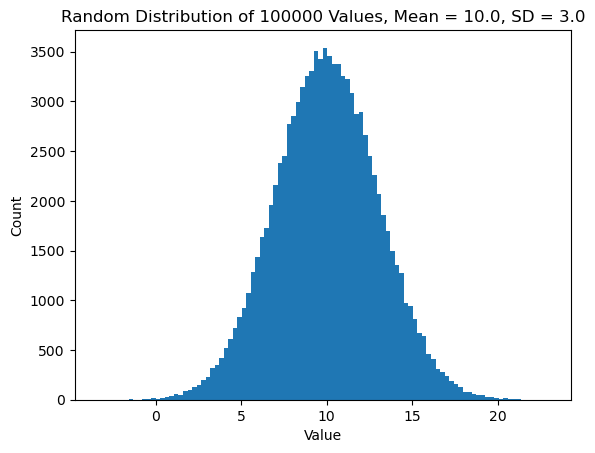

In [18]:
# create a display object
fig, ax = plt.subplots()

# plot histogram of the data
ax.hist(sample, bins=100)
ax.set_title(f'Random Distribution of {n} Values, Mean = {mu}, SD = {sigma}')
ax.set_xlabel('Value')
ax.set_ylabel('Count')

# some stats test will build on this over the coming days

In [19]:
import scipy.stats as st
from scipy.stats import kstest

# The Shapiro wilk test

The Shapiro-Wilk test is a hypothesis test that is applied to a sample with a null hypothesis that the sample has been generated from a normal distribution. If the p-value is low, we can reject such a null hypothesis and say that the sample has not been generated from a normal distribution. It was introduced by Samuel Shapiro and Martin Wilk in 1965 and has since become a standard method for normality testing due to its effectiveness and reliability.

In [20]:
shapiro_test = st.shapiro(sample)
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)
if p_value > 0.05:
    print("The  data follows a normal distribution (fail to reject H0).")
else:
    print("The data does not follow a normal distribution (reject H0).")

Shapiro-Wilk Test Statistic: 0.9999525547027588
p-value: 0.1494354009628296
The data does not follow a normal distribution (reject H0).


c:\Users\keith\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Anderson darling test 

The Anderson–Darling test is a statistical test of whether a given sample of data is drawn from a given probability distribution. the test assumes that there are no parameters to be estimated in the distribution being tested, in which case the test and its set of critical values is distribution-free. The test is named after Theodore Wilbur Anderson and Donald A. Darling, 

In [21]:
ad_test = st.anderson(sample, dist='norm')
print("anderson dardling Test Statistic:", ad_test.statistic)



anderson dardling Test Statistic: 0.5347228861501208


# the KS test

The Kolmogorov-Smirnov (KS) test is a non-parametric test used to determine if a sample comes from a specific distribution or if two samples come from the same distribution. It is particularly useful for comparing continuous distributions.

In [22]:
ks_stat, p_value = kstest(sample, 'norm', args=(mu, sigma))

# Output the results
print("Kolmogorov-Smirnov Test Statistic:", ks_stat)
print("p-value:", p_value)

# Interpretation
if p_value > 0.05:
    print("The Kolmogorov-Smirnov test suggests no significant deviation from normality.")
else:
    print("The Kolmogorov-Smirnov test suggests a significant deviation from normality.")

Kolmogorov-Smirnov Test Statistic: 0.0034205786787864234
p-value: 0.19203192167246408
The Kolmogorov-Smirnov test suggests no significant deviation from normality.


## qq plot

A Q-Q plot, short for “quantile-quantile” plot, is used to assess whether or not a set of data potentially came from some theoretical distribution.

In most cases, this type of plot is used to determine whether or not a set of data follows a normal distribution.

As a rule of thumb, the more that the points in a Q-Q plot lie on a straight diagonal line, the more normally distributed the data.

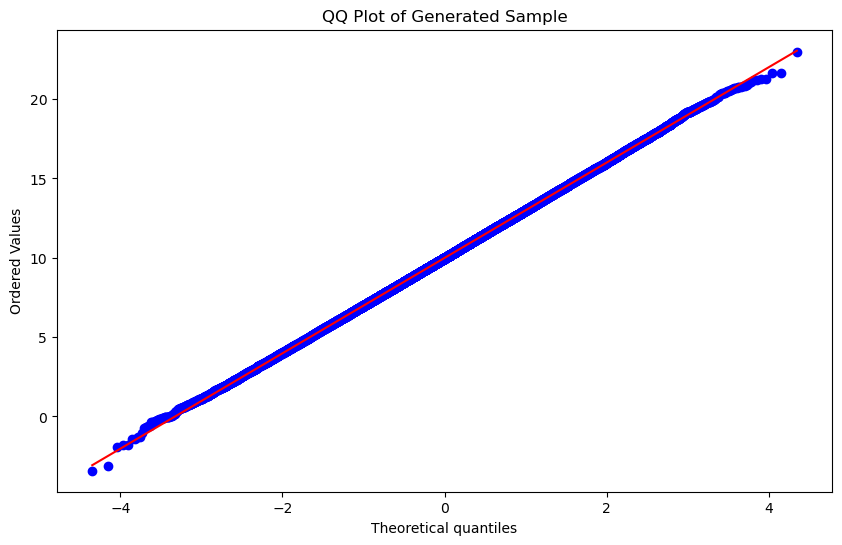

In [23]:
# Generate QQ plot again for clarity
plt.figure(figsize=(10, 6))
st.probplot(sample, dist="norm", plot=plt)
plt.title("QQ Plot of Generated Sample")

# Show the QQ plot
plt.show()

the above plot seems to show that our data is of a normal disturbution 

# Probability density function

The Probability Density Function (PDF) is a fundamental concept in probability and statistics, used to describe the likelihood of different outcomes in a continuous random variable. In continuous probability, we can't assign a non-zero probability to specific outcomes. Instead, the PDF gives a density of probability, which we use to find probabilities over a range of values. 

The formula for a PDF for normal disturbution is as follows

$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$

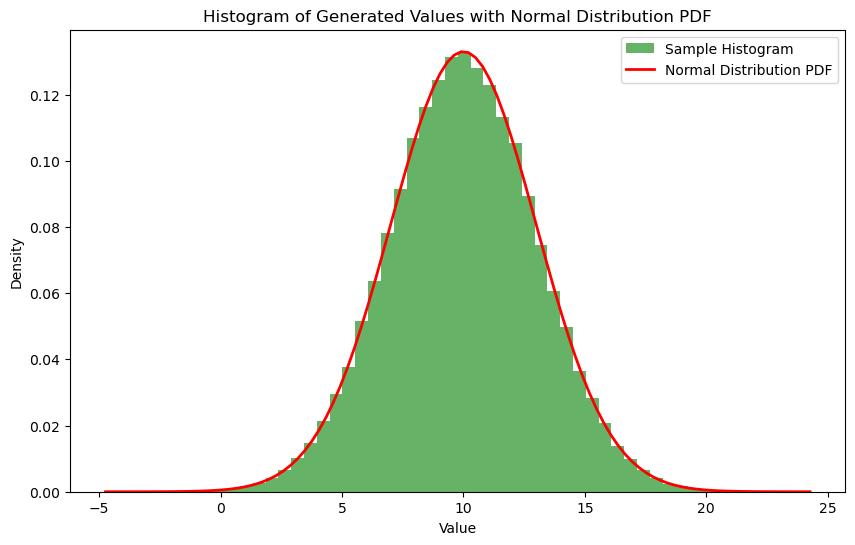

In [24]:
plt.figure(figsize=(10, 6))

# Plot histogram of the sample
plt.hist(sample, bins=50, density=True, alpha=0.6, color='g', label='Sample Histogram')

# Plot the normal distribution PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = st.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'r', linewidth=2, label='Normal Distribution PDF')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Generated Values with Normal Distribution PDF')
plt.legend()

# Show the plot
plt.show()


as we can see the histogram of the generated sample matches well with the theoretical normal distribution PDF, confirming that the values follow a normal distribution. This along with the QQ plot and our stats test have proven our disturbution is normal. 

# Cumulative Distribution Function

The CDF, on the other hand, shows the cumulative probability up to a certain value. Rather than focusing on where individual values are likely to occur, the CDF tells us how likely it is for a random variable to be less than or equal to a given value.

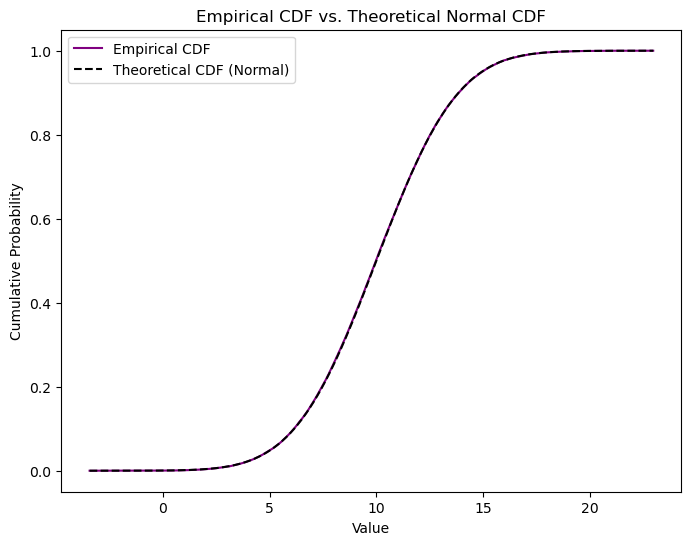

In [25]:



# Generate the empirical CDF of the sample
sorted_sample = np.sort(sample)
ecdf = np.arange(1, n + 1) / n

# Theoretical CDF based on normal distribution
theoretical_cdf = st.norm.cdf(sorted_sample, loc=mu, scale=sigma)

# Plotting the CDFs
plt.figure(figsize=(8, 6))
plt.plot(sorted_sample, ecdf, label='Empirical CDF', color='purple')
plt.plot(sorted_sample, theoretical_cdf, label='Theoretical CDF (Normal)', color='black', linestyle='--')
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.title("Empirical CDF vs. Theoretical Normal CDF")
plt.legend()
plt.show()

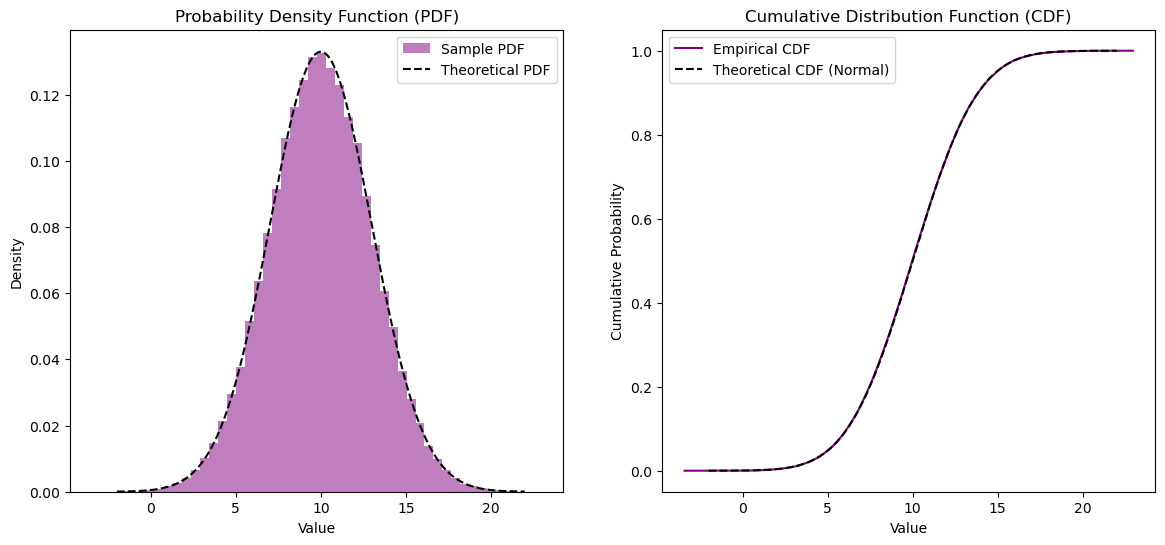

In [26]:



sorted_sample = np.sort(sample)

# Compute the empirical CDF of the sample
ecdf = np.arange(1, n + 1) / n

# Define range for theoretical PDF and CDF plots
x_values = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)

# Calculate theoretical PDF and CDF for a normal distribution
theoretical_pdf = st.norm.pdf(x_values, loc=mu, scale=sigma)
theoretical_cdf = st.norm.cdf(x_values, loc=mu, scale=sigma)

# Plot both PDF and CDF
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# PDF plot
axs[0].hist(sample, bins=50, density=True, alpha=0.5, color='purple', label='Sample PDF')
axs[0].plot(x_values, theoretical_pdf, color='black', linestyle='--', label='Theoretical PDF')
axs[0].set_title("Probability Density Function (PDF)")
axs[0].set_xlabel("Value")
axs[0].set_ylabel("Density")
axs[0].legend()

# CDF plot
axs[1].plot(sorted_sample, ecdf, label='Empirical CDF', color='purple')
axs[1].plot(x_values, theoretical_cdf, label='Theoretical CDF (Normal)', color='black', linestyle='--')
axs[1].set_title("Cumulative Distribution Function (CDF)")
axs[1].set_xlabel("Value")
axs[1].set_ylabel("Cumulative Probability")
axs[1].legend()

plt.show()

# qaurtile range

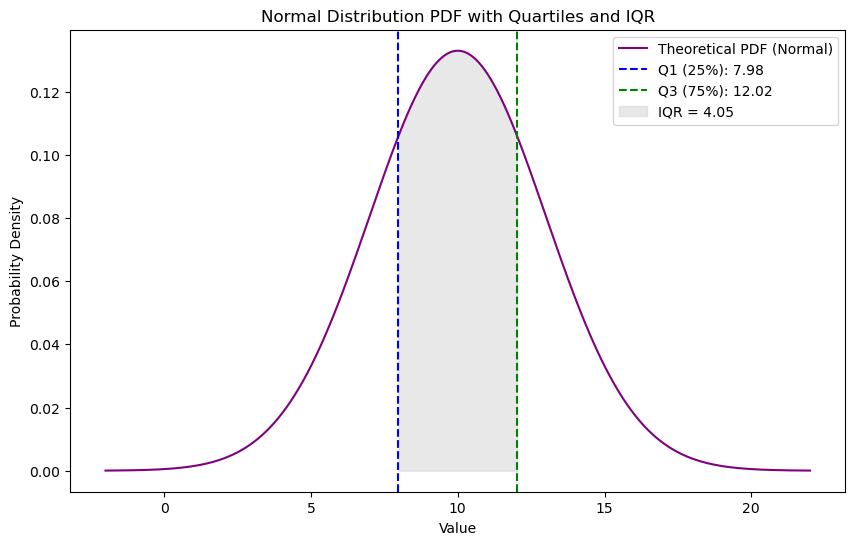

In [27]:
# Define x values for the PDF plot
x_values = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100000)

# Calculate theoretical PDF for the normal distribution
theoretical_pdf = st.norm.pdf(x_values, loc=mu, scale=sigma)

# Calculate quartiles
Q1 = mu - 0.6745 * sigma  # First quartile (25th percentile)
Q3 = mu + 0.6745 * sigma  # Third quartile (75th percentile)
IQR = Q3 - Q1             # Interquartile Range

# Plotting the PDF with quartile markers
plt.figure(figsize=(10, 6))
plt.plot(x_values, theoretical_pdf, color='purple', label='Theoretical PDF (Normal)')
plt.axvline(Q1, color='blue', linestyle='--', label=f'Q1 (25%): {Q1:.2f}')
plt.axvline(Q3, color='green', linestyle='--', label=f'Q3 (75%): {Q3:.2f}')
plt.fill_between(x_values, theoretical_pdf, where=((x_values >= Q1) & (x_values <= Q3)), 
                 color='lightgray', alpha=0.5, label=f'IQR = {IQR:.2f}')

# Labels and title
plt.title("Normal Distribution PDF with Quartiles and IQR")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

# Central limit theorem 



The central limit theorem in statistics states that, given a sufficiently large sample size, the sampling distribution of the mean for a variable will approximate a normal distribution regardless of that variable’s distribution in the population, and even if the underlying data is not normally distributed, the means of repeated samples will be distributed normally. The central limit theorem applies to almost all types of probability distributions. For this to apply effectively, the sample size needs to be sufficiently large. In practice, this often means a sample size of 30 or more is required. 

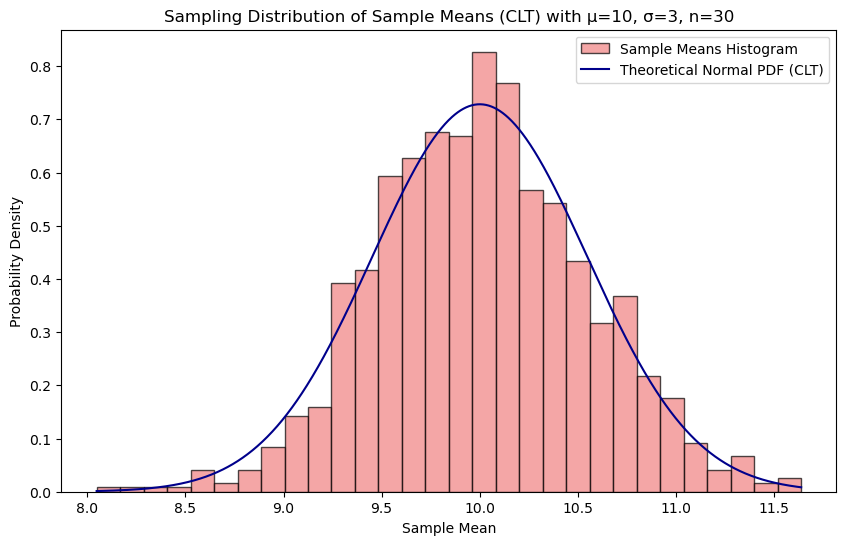

In [28]:

sample_size = 30  # sample size for each subset to demonstrate CLT
num_samples = 1000  # number of samples to draw

# Generate sample means using the same parameters (mu=10, sigma=3, sample size=30)
sample_means_exact = [np.mean(np.random.normal(loc=mu, scale=sigma, size=sample_size)) for _ in range(num_samples)]

# Theoretical parameters for the sampling distribution
sampling_dist_mean_exact = mu  # Expected mean of sampling distribution
sampling_dist_std_exact = sigma / np.sqrt(sample_size)  # Standard error of the mean

# Define x values for the sampling distribution PDF plot based on exact parameters
x_sampling_exact = np.linspace(min(sample_means_exact), max(sample_means_exact), 1000)

# Calculate theoretical PDF of the sampling distribution of the mean with exact inputs
sampling_pdf_exact = st.norm.pdf(x_sampling_exact, loc=sampling_dist_mean_exact, scale=sampling_dist_std_exact)

# Plotting the sampling distribution of the sample means with exact inputs
plt.figure(figsize=(10, 6))
plt.hist(sample_means_exact, bins=30, density=True, color='lightcoral', edgecolor='black', alpha=0.7, label='Sample Means Histogram')
plt.plot(x_sampling_exact, sampling_pdf_exact, color='darkblue', label='Theoretical Normal PDF (CLT)')

# Labels and title
plt.title("Sampling Distribution of Sample Means (CLT) with μ=10, σ=3, n=30")
plt.xlabel("Sample Mean")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


# Conclusion

In this section We have looked at normal distubution and how to create this using numpy, we have touched upon some stat test and plots to expand on this to help give insight into normal distubutions and also statastilcal testing. We have seen there is many areas to explore on this but to come back to our main question on this task we can see the data is a normal disturbuton. 

----------------------------------------------------------------------------------------------------

# task three

t-Test, also known as the Student’s t-test, is a method of testing hypotheses about the mean of a small sample drawn from a normally distributed population when the population standard deviation is unknown. t-tests are used to compare sample populations and infer conclusions about the larger population. For tests involving the mean of a sample of size greater than 30 the normal distribution is usually applied.

An employee in the Guinness brewery, first published in 1908 in the scientific journal Biometrika using the pseudonym "Student". Gosset found that existing statistical techniques using large samples were not useful for the small sample sizes that he encountered in his work.

In [29]:
before = [63, 68, 70, 64, 74, 67, 70, 57, 66, 65]
after = [64, 64, 68, 64, 73, 70, 72, 54, 61, 63]


<Axes: >

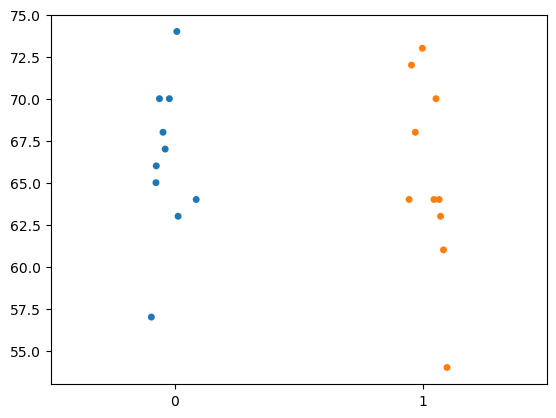

In [30]:
sns.stripplot(data=[before, after])

C:\Users\keith\AppData\Local\Temp\ipykernel_3960\996885588.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(before, shade=True, color="blue", label="Before")
C:\Users\keith\AppData\Local\Temp\ipykernel_3960\996885588.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(after, shade=True, color="#84bf41", label="After")


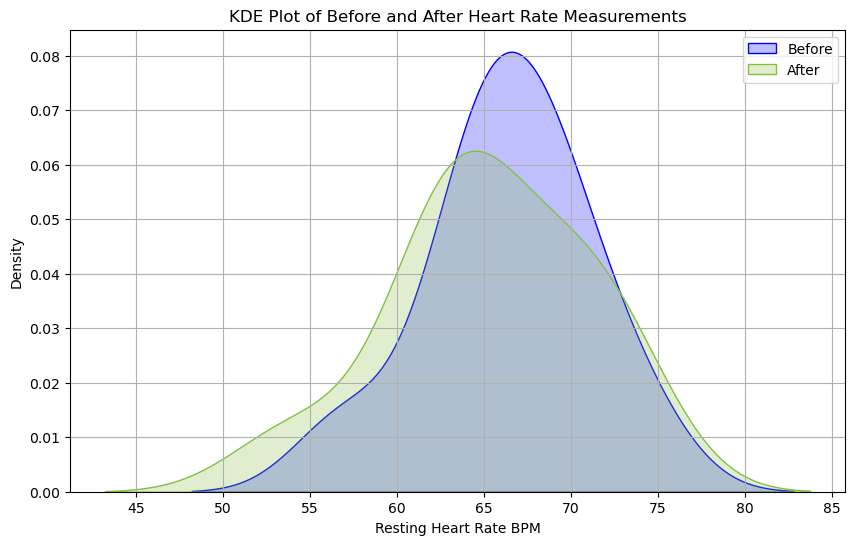

In [31]:
plt.figure(figsize=(10, 6))

# KDE plot for 'before' data
sns.kdeplot(before, shade=True, color="blue", label="Before")

# KDE plot for 'after' data
sns.kdeplot(after, shade=True, color="#84bf41", label="After")

# Labels and title
plt.title("KDE Plot of Before and After Heart Rate Measurements")
plt.xlabel("Resting Heart Rate BPM")
plt.ylabel("Density")
plt.legend()
plt.grid()

# Show plot
plt.show()

In [32]:
shapiro_test = st.shapiro(before)
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)
if p_value > 0.05:
    print("The  data follows a normal distribution (fail to reject H0).")
else:
    print("The data does not follow a normal distribution (reject H0).")


Shapiro-Wilk Test Statistic: 0.9726138710975647
p-value: 0.9139653444290161
The  data follows a normal distribution (fail to reject H0).


In [33]:
shapiro_test = st.shapiro(after)
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)
if p_value > 0.05:
    print("The  data follows a normal distribution (fail to reject H0).")
else:
    print("The data does not follow a normal distribution (reject H0).")

Shapiro-Wilk Test Statistic: 0.9397047758102417
p-value: 0.5497328639030457
The  data follows a normal distribution (fail to reject H0).


In [34]:
t_statistic, p_value = st.ttest_rel(before, after)

In [35]:
alpha = 5 

In [36]:
df = len(before)+len(after)-2

# Calculate the critical t-value
# ppf is used to find the critical t-value for a two-tailed test
critical_t = st.t.ppf(1 - alpha/2, df)

In [37]:
print("T-value:", t_statistic)
print("P-Value:", p_value)
print("Critical t-value:", critical_t)

T-value: 1.337227482480628
P-Value: 0.21396011317404623
Critical t-value: nan


In [38]:
print('With T-value')
if np.abs(t_statistic) >critical_t:
    print('There is significant difference between two groups')
else:
    print('No significant difference found between two groups')

print('With P-value')
if p_value >alpha:
    print('No evidence to reject the null hypothesis that a significant difference between the two groups')
else:
    print('Evidence found to reject the null hypothesis that a significant difference between the two groups')

With T-value
No significant difference found between two groups
With P-value
Evidence found to reject the null hypothesis that a significant difference between the two groups


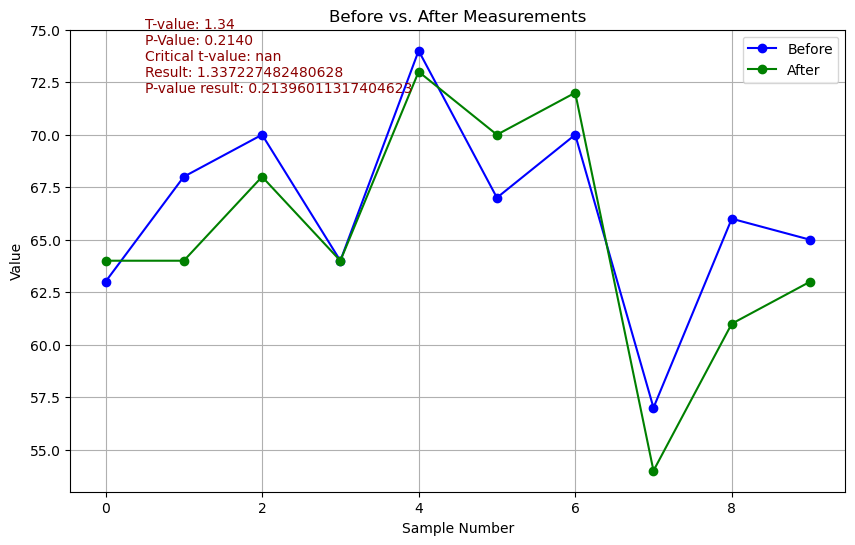

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(before, label="Before", marker="o", color="blue")
plt.plot(after, label="After", marker="o", color="green")
plt.title("Before vs. After Measurements")
plt.xlabel("Sample Number")
plt.ylabel("Value")
plt.legend()

# Annotating t-test results
plt.text(0.5, max(max(before), max(after)) - 2, 
         f"T-value: {t_statistic:.2f}\n"
         f"P-Value: {p_value:.4f}\n"
         f"Critical t-value: {critical_t:.2f}\n"
         f"Result: {t_statistic}\n"
         f"P-value result: {p_value}",
         fontsize=10, color="darkred")

plt.grid()
plt.show()

# Degrees of freedom

The degrees of freedom (df) in statistical tests are a measure of how many values in a calculation are free to vary while still satisfying given constraints. It's a concept used to determine the critical value or distribution shape for a test statistic, such as the t-statistic in a t-test.

1. Paired t-test: The degrees of freedom are 
n−1, where n is the number of paired observations (e.g., each "before" and "after" measurement pair). This is because we calculate one mean difference for the entire dataset, reducing the "freedom" of our dataset by one.

2. Independent t-test: The degrees of freedom depend on the sample sizes of the two groups



# Why are degrees of freedom important?
Degrees of freedom adjust the shape of the t-distribution. For smaller degrees of freedom, the t-distribution has fatter tails, reflecting more uncertainty in the test statistic. As df increases, the t-distribution approaches the normal distribution.

# creating a t test using numpy 

In [41]:
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])

differences = before - after

# Compute the t-statistic
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)  # Use ddof=1 for sample std deviation
n = len(differences)
t_statistic = mean_diff / (std_diff / np.sqrt(n))

# Degrees of freedom
df = n - 1

# Calculate the p-value
p_value = 2 * st.t.sf(np.abs(t_statistic), df)  # Two-tailed test

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpretation at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference exists.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-statistic: 1.3372274824806283
P-value: 0.21396011317404615
Fail to reject the null hypothesis: No significant difference.


# plotting the t test to show the degrees of freedom

In [43]:
from scipy.stats import t
n = 10  # Number of paired samples
df = n - 1  # Degrees of freedom

# Generate t-distribution values
x = np.linspace(-4, 4, 500)
y = t.pdf(x, df)

# Calculate critical t-value (two-tailed, alpha=0.05)
alpha = 0.05
critical_t = t.ppf(1 - alpha / 2, df)

# Example t-statistic (replace with actual calculated value if needed)
t_statistic = -1.894  



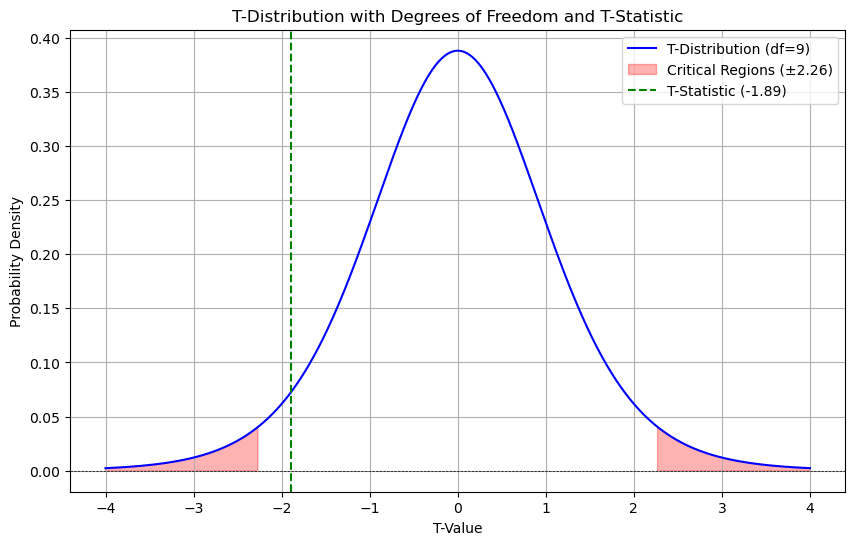

In [44]:
# Plot t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'T-Distribution (df={df})', color='blue')

# Highlight critical regions
plt.fill_between(x, 0, y, where=(x <= -critical_t) | (x >= critical_t), color='red', alpha=0.3, label=f'Critical Regions (±{critical_t:.2f})')

# Mark t-statistic
plt.axvline(t_statistic, color='green', linestyle='--', label=f'T-Statistic ({t_statistic:.2f})')

# Labels and legend
plt.title("T-Distribution with Degrees of Freedom and T-Statistic")
plt.xlabel("T-Value")
plt.ylabel("Probability Density")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()

# Show plot
plt.grid()
plt.show()

-------------------------------------------------------------------------------------------------------------------